In [113]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc


plt.style.use("Solarize_Light2")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv("D:/APU/Data source/diabetes_binary_health_indicators_BRFSS2015.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<AxesSubplot: ylabel='count'>

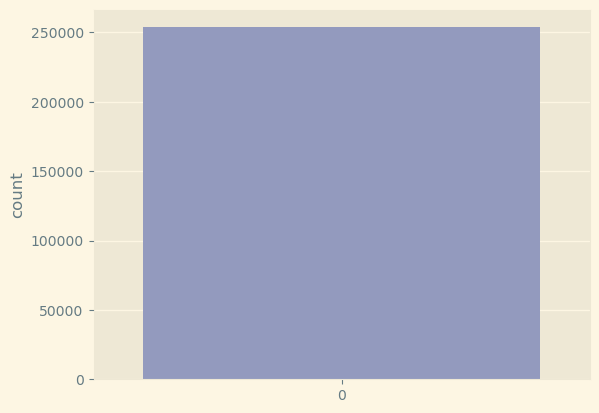

In [3]:
import seaborn as sns
sns.countplot(df['Diabetes_binary'], palette='BuPu')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.shape

(253680, 22)

In [6]:
df.sample(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
98464,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,3.0
248153,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,1.0,0.0,13.0,4.0,3.0
172503,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,4.0,7.0
199128,0.0,1.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,4.0,5.0
5684,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,5.0,8.0
193853,0.0,0.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,7.0
118483,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,15.0,0.0,0.0,1.0,8.0,4.0,4.0
63829,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,4.0,0.0,0.0,0.0,4.0,5.0,1.0
118403,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0,6.0,8.0
88597,1.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,5.0,5.0


In [7]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
# Cleaning Dataset

In [9]:
df.isna().sum() # No missing values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [11]:
df.duplicated().any()

True

In [12]:
df.duplicated().sum()

24206

In [13]:
# There are 23899 duplicates and must be dropped
df.drop_duplicates(inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [16]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

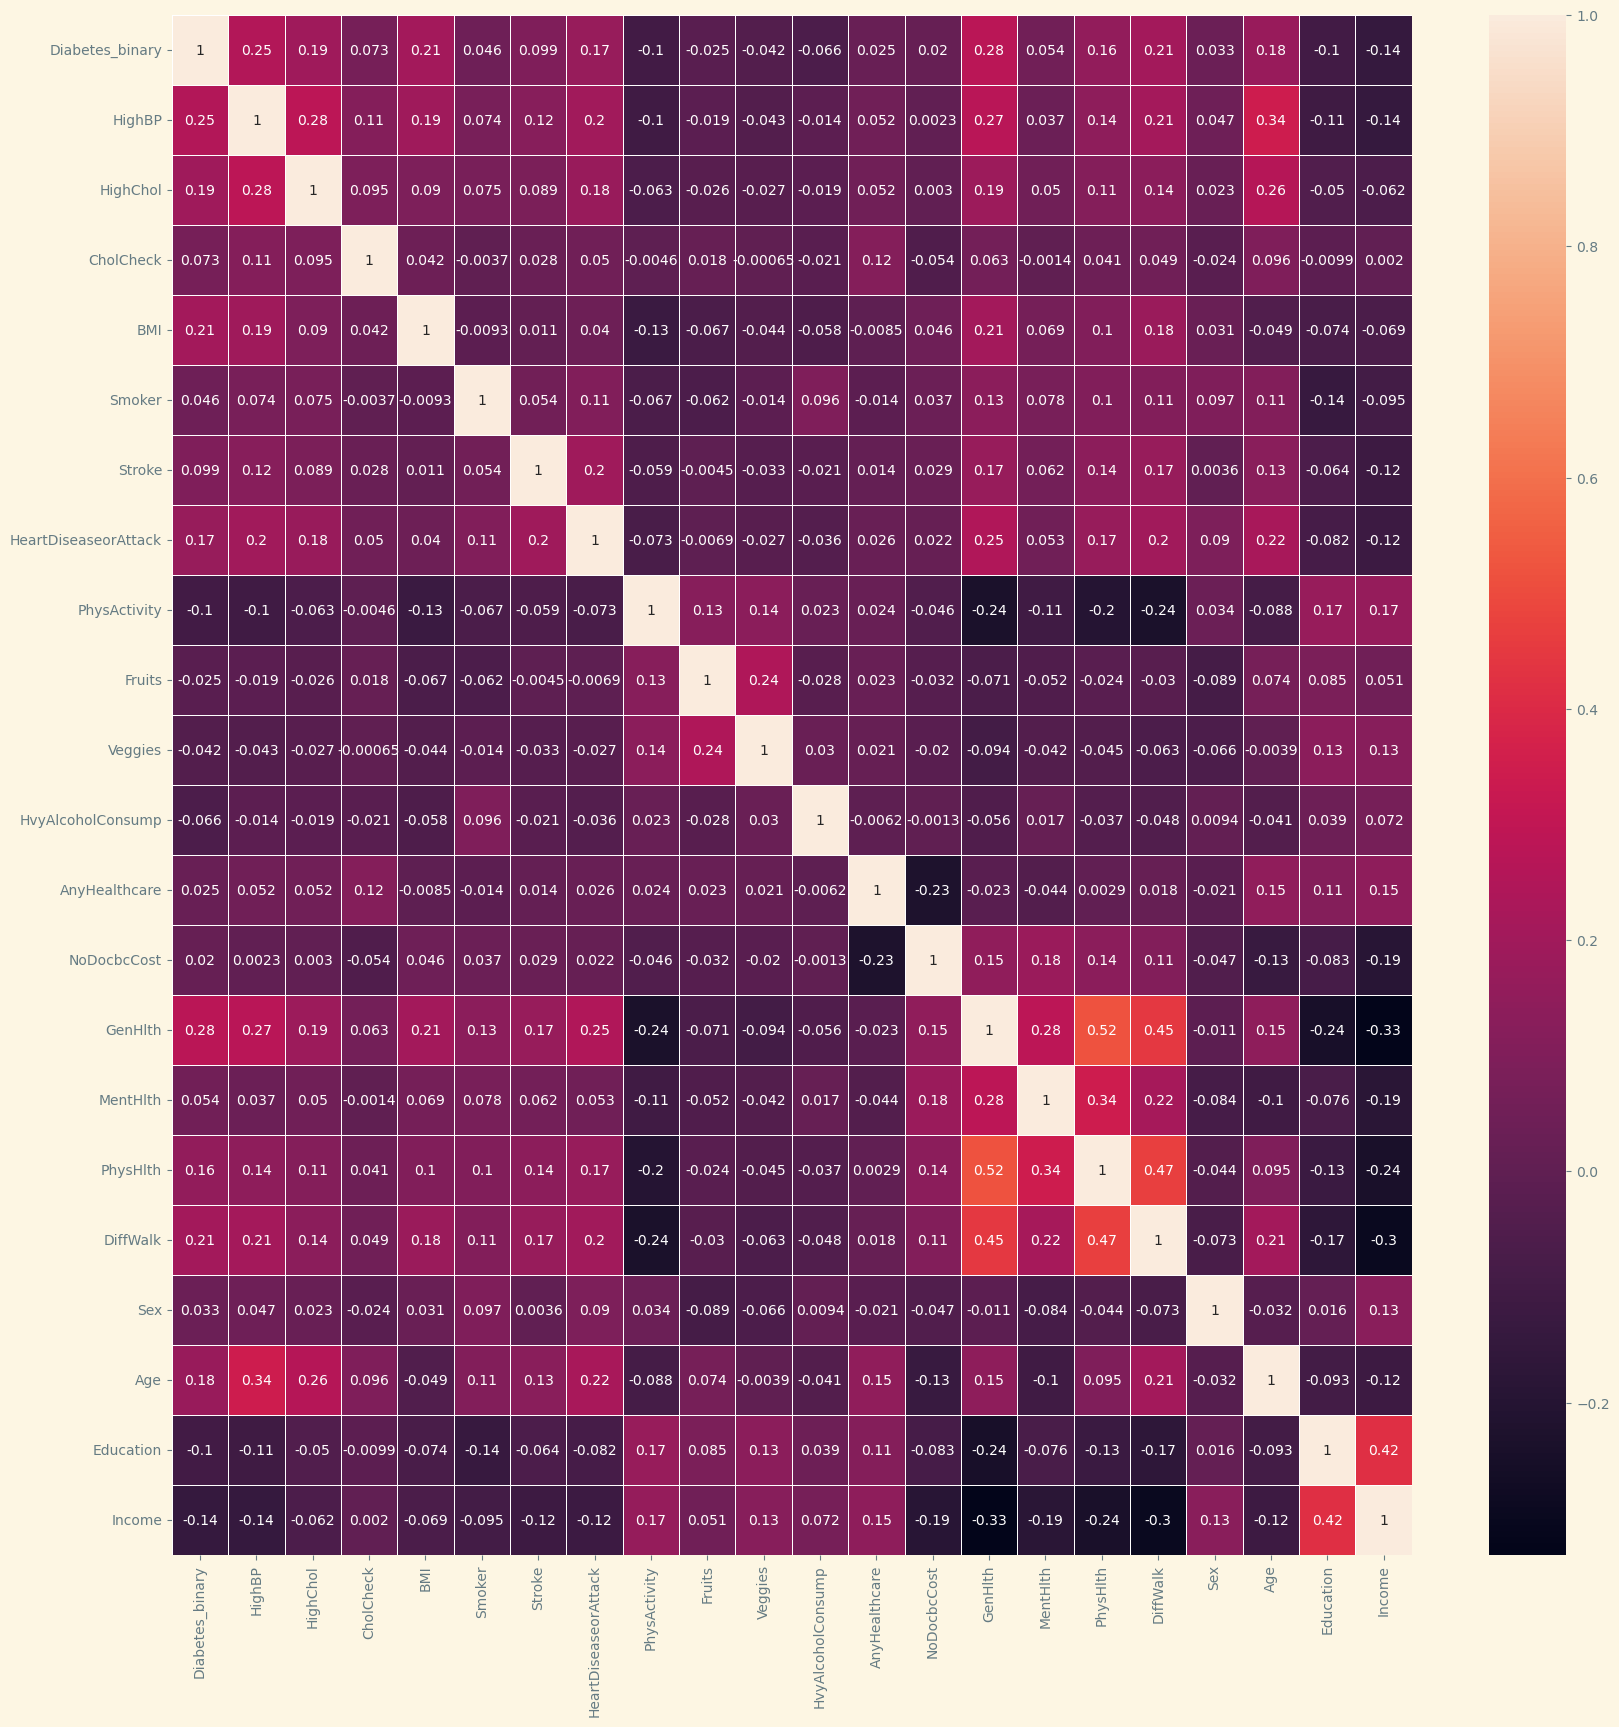

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.5,annot=True)
plt.show()

In [19]:
# Check The Outliers

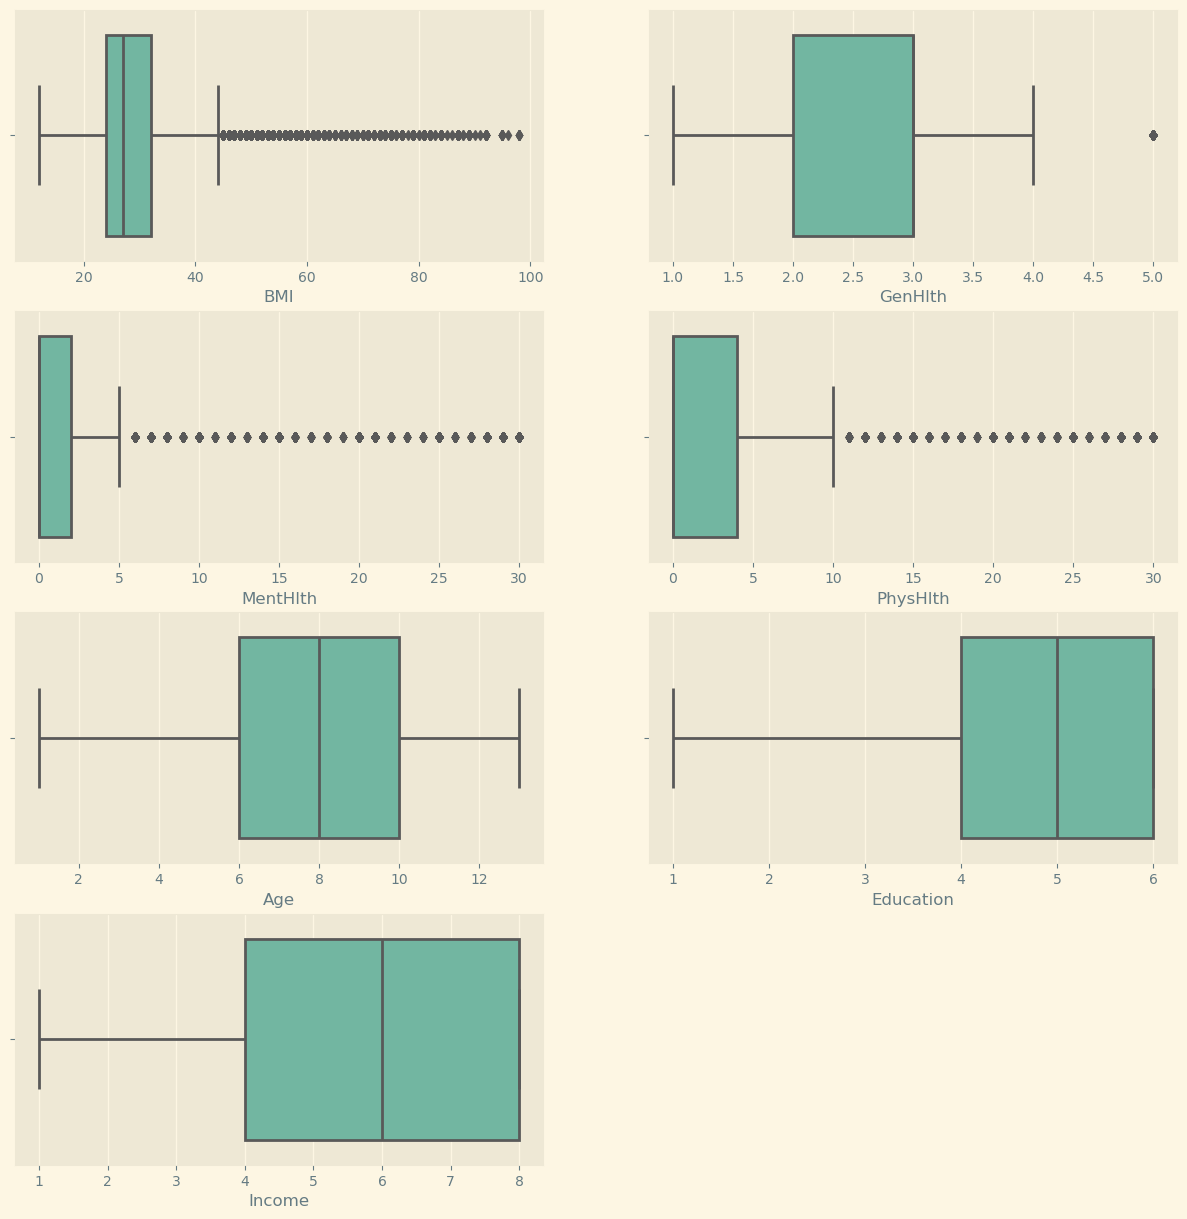

In [20]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

In [21]:
# From the results above, BMI has a lot of outliers.

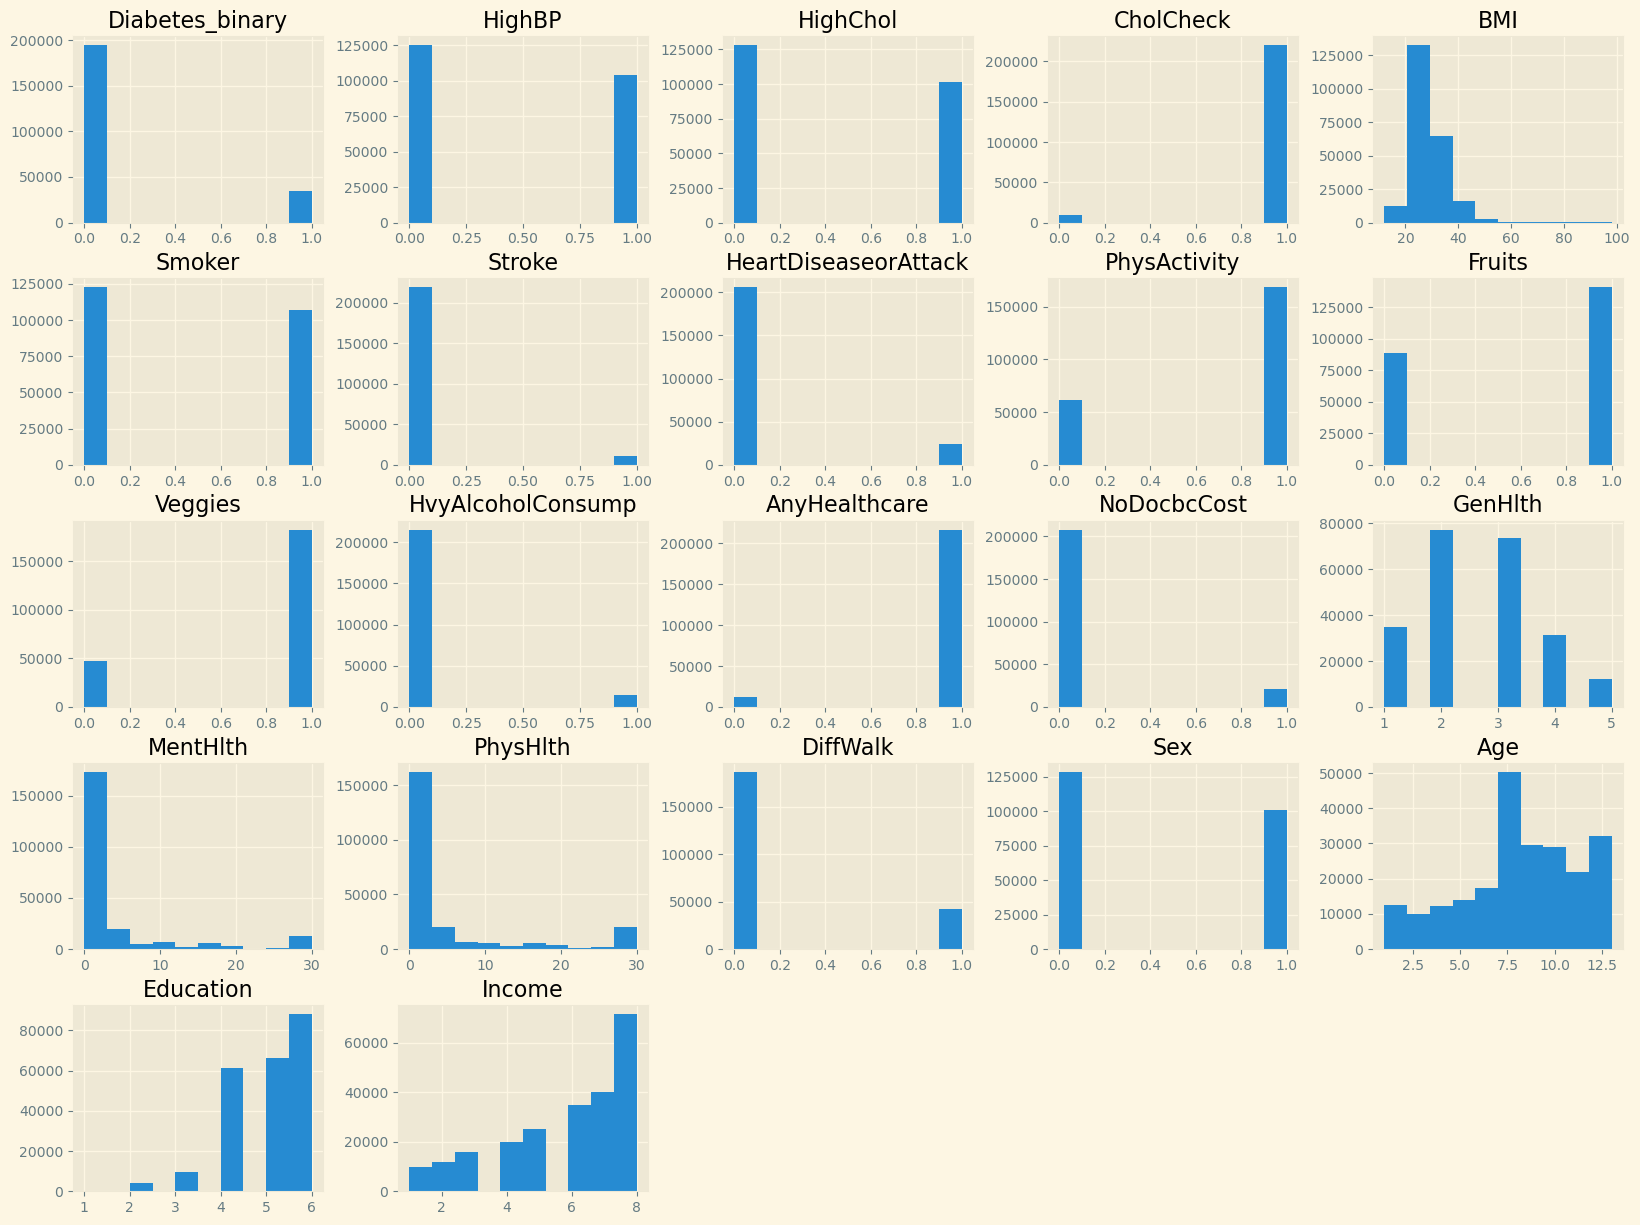

In [22]:
#using histogram to understand dataset data better

df.hist(figsize=(20,15));

In [23]:
# Diabetes_binary's relation with other columns Through bar Graph Result.

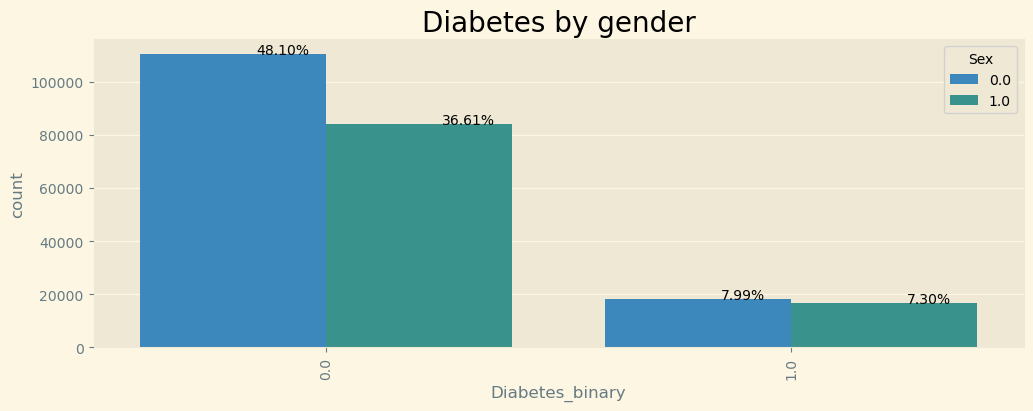

In [24]:
# Distribution of diabetes by gender
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_binary',data=df,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

In [25]:
# Gender has no effect to developing diabetes, male and female are equally vulnerable for Diabetes.

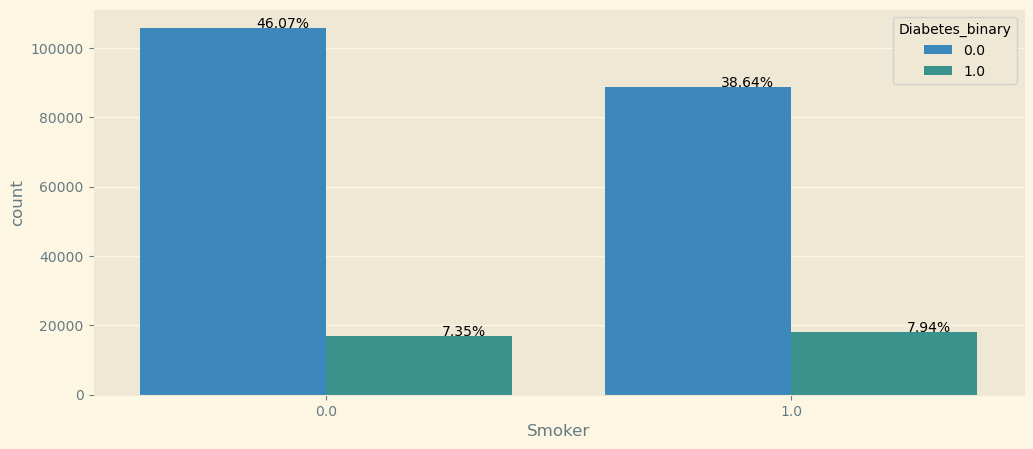

In [26]:
# Relationship between Diabetes_binary and Smoker
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_binary' , data = df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

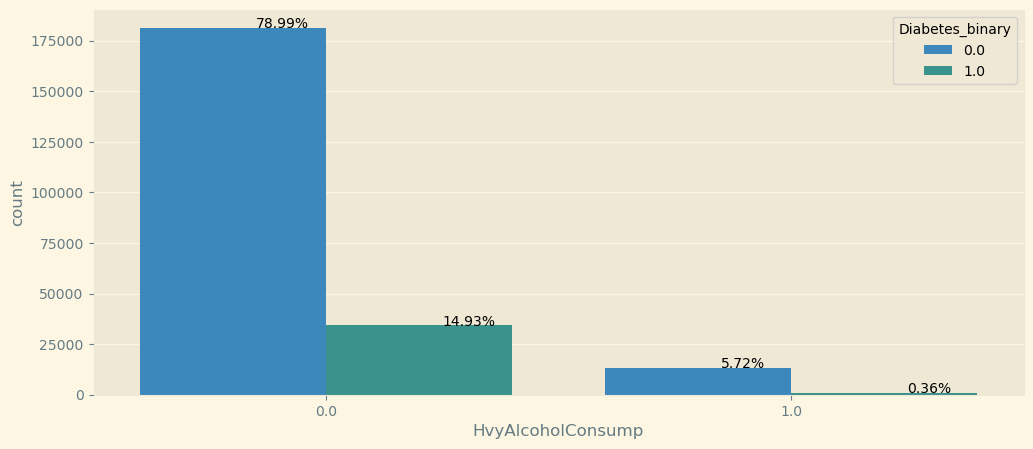

In [27]:
# Diabetes vs HvyAlcoholConsump
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_binary' , data = df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

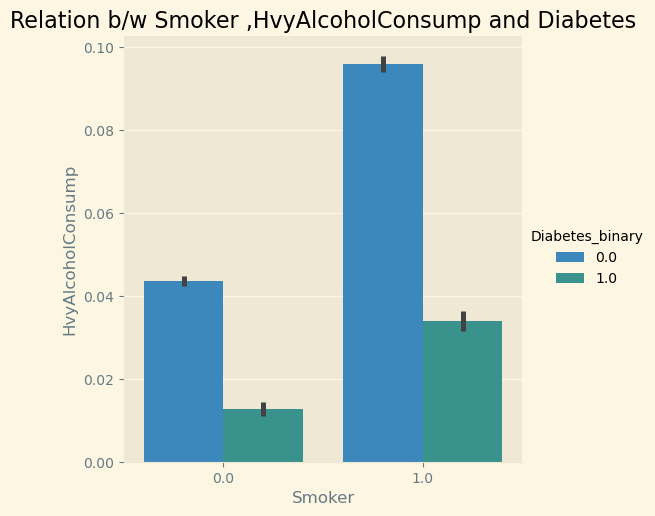

In [28]:
# Smoker and HvyAlcoholConsump's combined effect on Diabetes.
# (1 in Smoker is Yes), (1 in HvyAlcoholConsump is Yes), and (0 is Not Diabetic, 1 is Diabetic)

sns.catplot(x="Smoker", y="HvyAlcoholConsump", data=df, hue="Diabetes_binary", kind="bar")
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

In [29]:
# The results from above shows that both smoking and HvyAlcoholConsump increase the risk of diabetes.

<AxesSubplot: ylabel='count'>

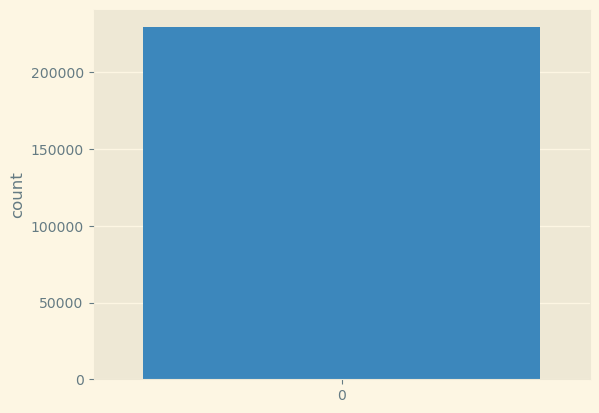

In [30]:
# Stroke
sns.countplot(df['Stroke'])

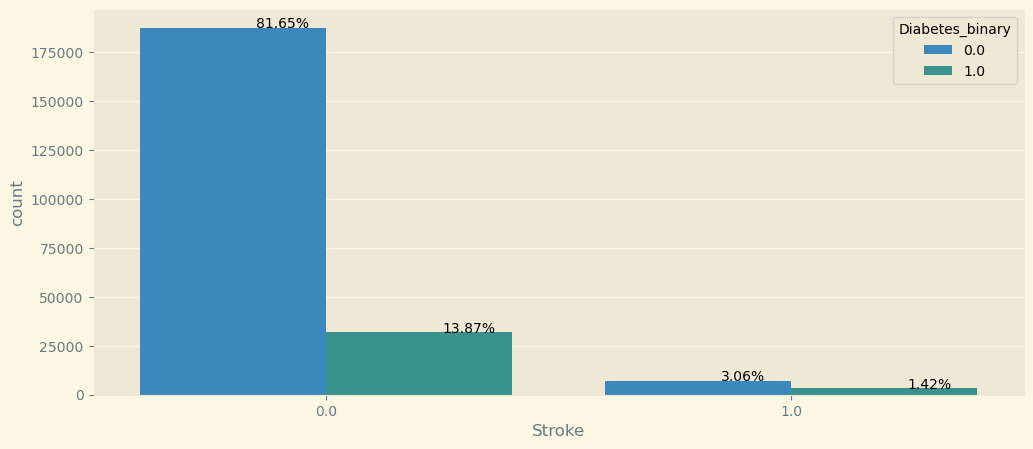

In [31]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Stroke', hue='Diabetes_binary' , data = df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

In [32]:
# Diabetes have a low effect on having a stroke but in fact, Diabetes increases the chance of having a stroke.
# Which can damage brain tissue and cause disability or even death.

<AxesSubplot: xlabel='HeartDiseaseorAttack', ylabel='count'>

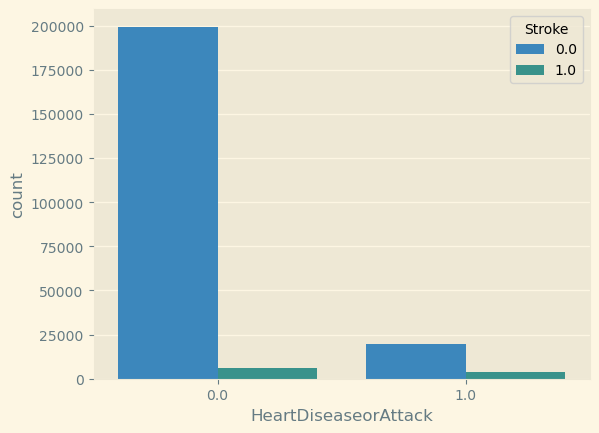

In [33]:
# HeartDiseaseorAttack
sns.countplot(data=df,x='HeartDiseaseorAttack',hue='Stroke')

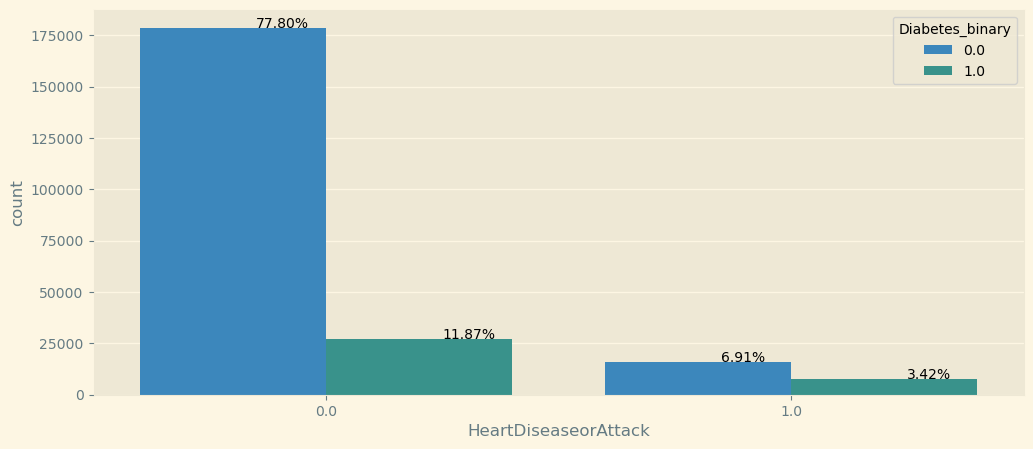

In [34]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_binary' , data = df);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

In [35]:
# The chance of diabetes increases as the person has Heart Disease or Attack.

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

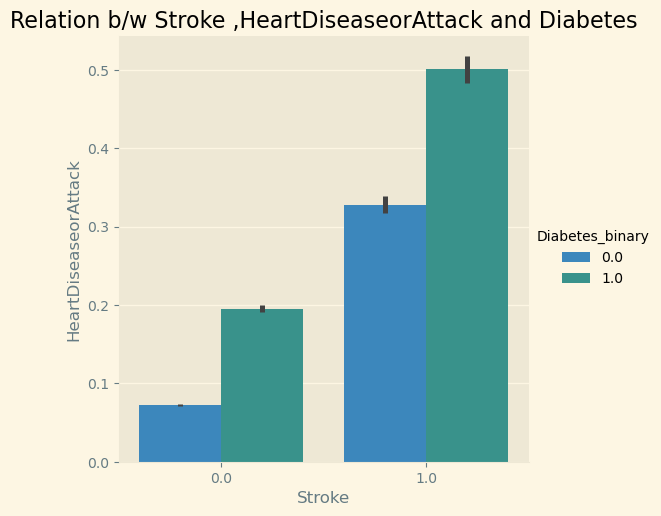

In [36]:
# Stroke and HeartDiseaseorAttack's combined effect on Diabetes.
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

In [37]:
# The results show that stroke and heartDiseaseorAttack increases the risk of Diabetes.

<AxesSubplot: xlabel='Diabetes_binary', ylabel='count'>

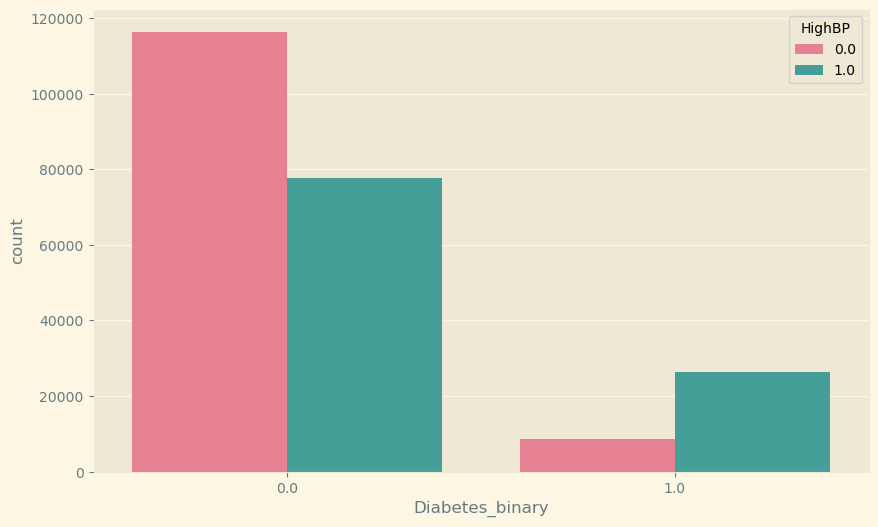

In [38]:
# High blood pressure
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Diabetes_binary',hue='HighBP',palette='husl')

<AxesSubplot: xlabel='Diabetes_binary', ylabel='count'>

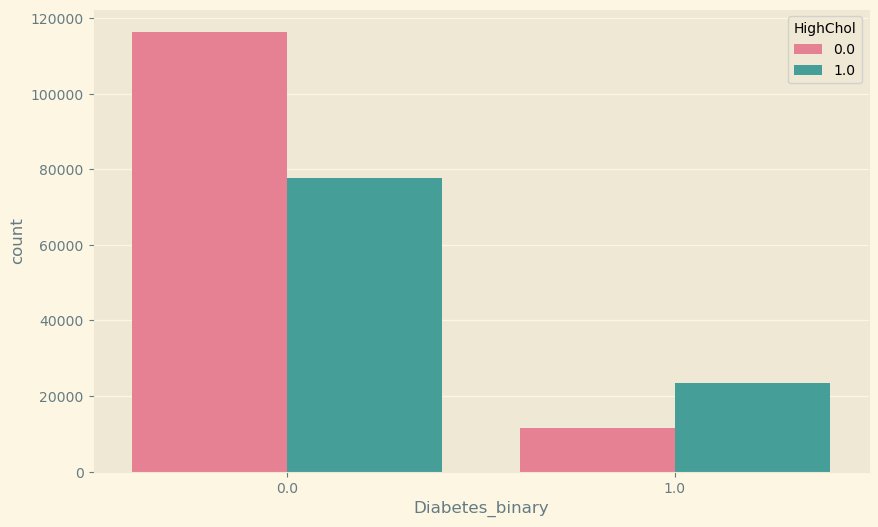

In [39]:
# High cholesterol
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Diabetes_binary',hue='HighChol',palette='husl')

In [40]:
# Generally diabetic patients have high blood pressure and cholesterol.

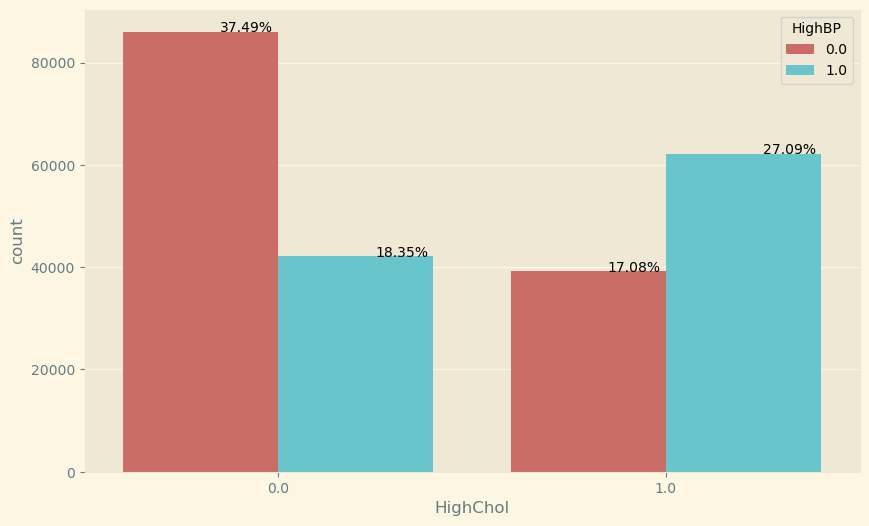

In [41]:
# # HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=df,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/df.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

In [42]:
# High cholesterol and high blood pressure are highly related to each other. 
# People with high cholesterol generally have high blood pressure.

In [43]:
# Checking the combined effect of HighBP and HighChol on Diabetes.

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

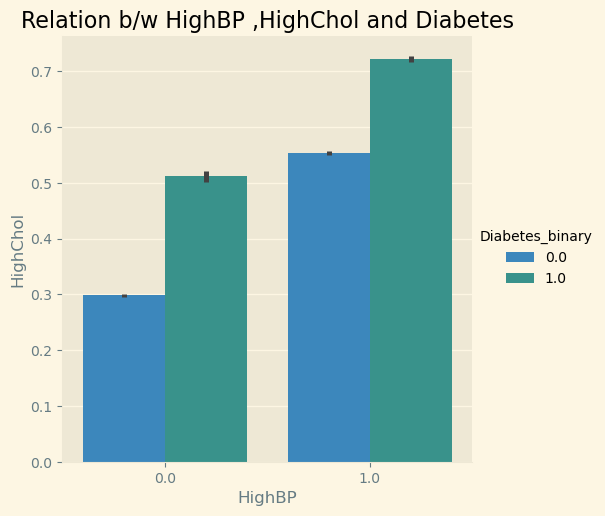

In [44]:
# (1 in HighBP is Yes), (1 in HighChol is Yes), and (0 is Not Diabetic, 1 is Diabetic)  

sns.catplot(x="HighBP" , y ="HighChol" , data = df , hue="Diabetes_binary" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

In [45]:
# The results show that HighBP and HighChol increase the risk of diabetes.

<Figure size 1200x500 with 0 Axes>

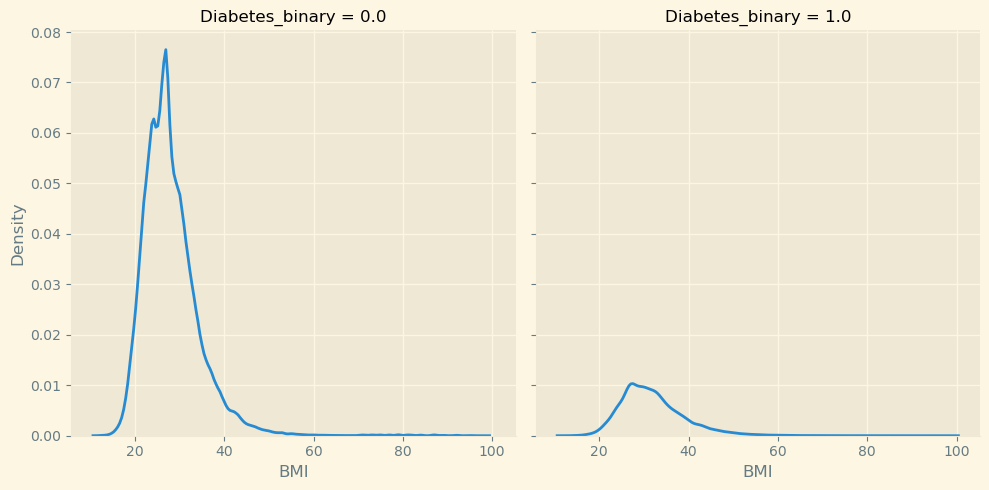

In [46]:
# BMI
plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='Diabetes_binary' , data = df, kind="kde" ,palette="Set2");

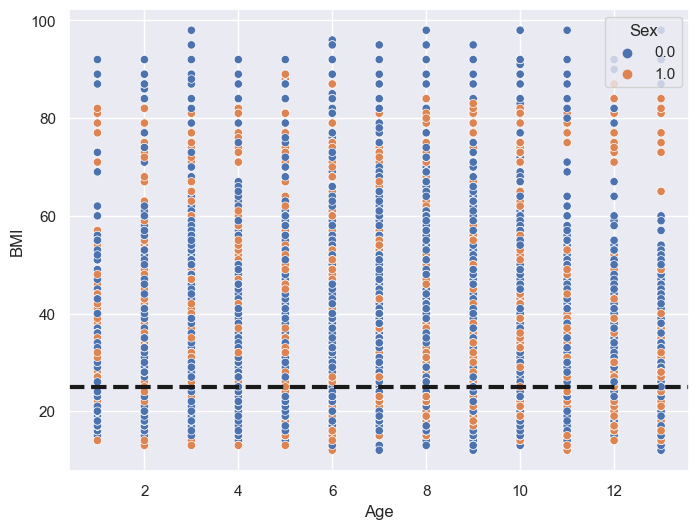

In [47]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df, x="Age", y="BMI", hue='Sex')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

In [48]:
# BMI for most people is higher.

In [49]:
# Splitting the BMI into Underweight,Normal weight,Overweight and Obesity.

BMI=pd.cut( df['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])
tsm=pd.crosstab(df['Diabetes_binary'],BMI,rownames=['Diabetes'])
tsm=tsm.astype(float)
tsm

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
0.0,2883.0,68285.0,69995.0,52976.0
1.0,169.0,5350.0,11419.0,18118.0


In [50]:
Diabetes_sum_lst=list(tsm.transpose().sum().values)
Diabetes_sum_lst

[194139.0, 35056.0]

In [51]:
for idx in range(tsm.values.shape[0]):
    tsm.values[idx]= tsm.values[idx]/Diabetes_sum_lst[idx]*100

tsm

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
0.0,1.485018,35.173252,36.054064,27.287665
1.0,0.482086,15.261296,32.573597,51.683021


In [52]:
# Being obese is likely to diabetes. 

<Figure size 1200x500 with 0 Axes>

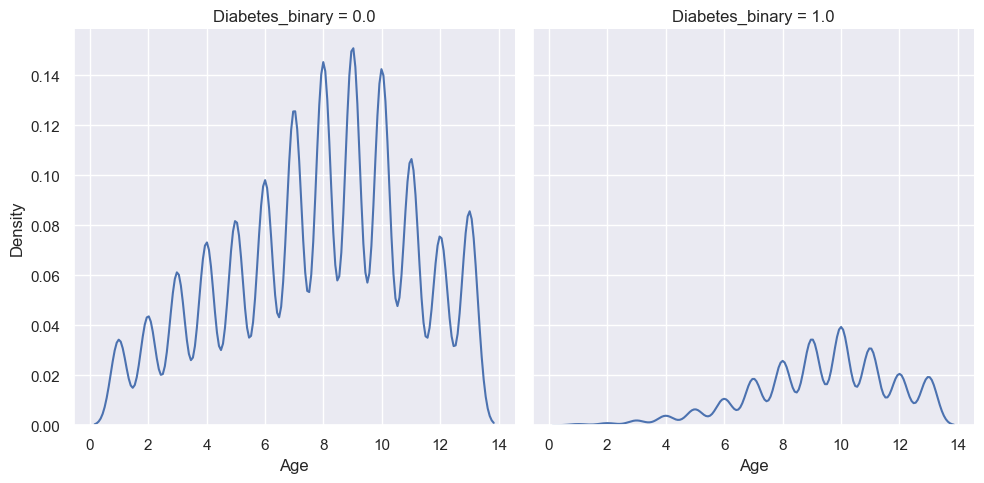

In [53]:
# Age
plt.figure(figsize=(12,5))
sns.displot(x='Age', col='Diabetes_binary' , data = df, kind="kde")
plt.show()

In [54]:
age = pd.cut(df['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229474, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 1000x600 with 0 Axes>

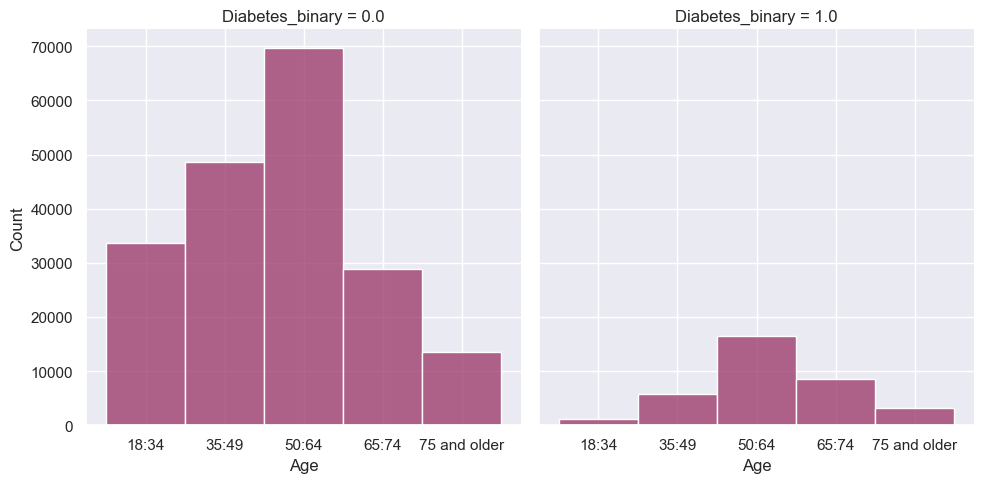

In [55]:
plt.figure(figsize=(10,6))
sns.displot(data=df,col='Diabetes_binary',x=age,color='#993366');

In [56]:
# It seems people with the age betweet 50 to 64 are most likely to develop diabetes.
# People older than 45 are more vulnerable for diabetes then the younger ones.
# When the age increase the number of diabetic people also increases.

<Figure size 1200x500 with 0 Axes>

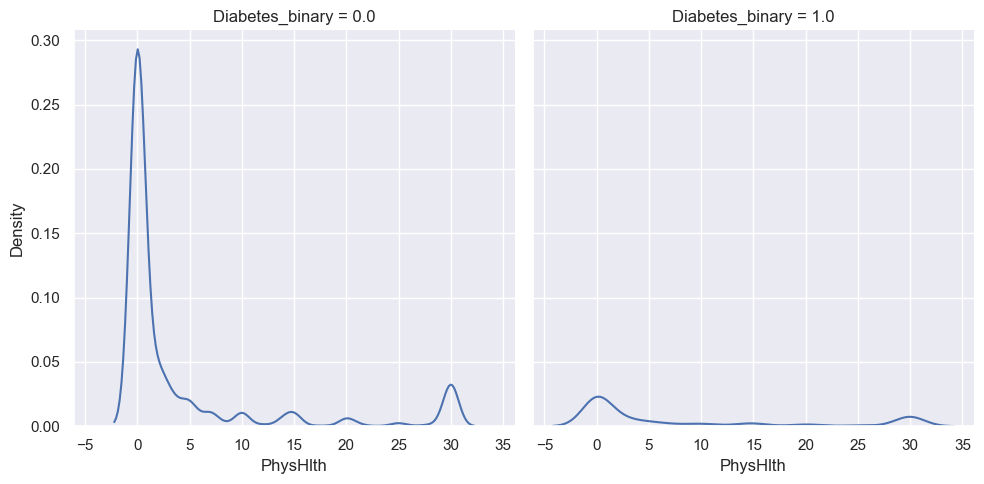

In [57]:
# PhysHlth
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_binary' , data = df, kind="kde")
plt.show()

<Figure size 1200x500 with 0 Axes>

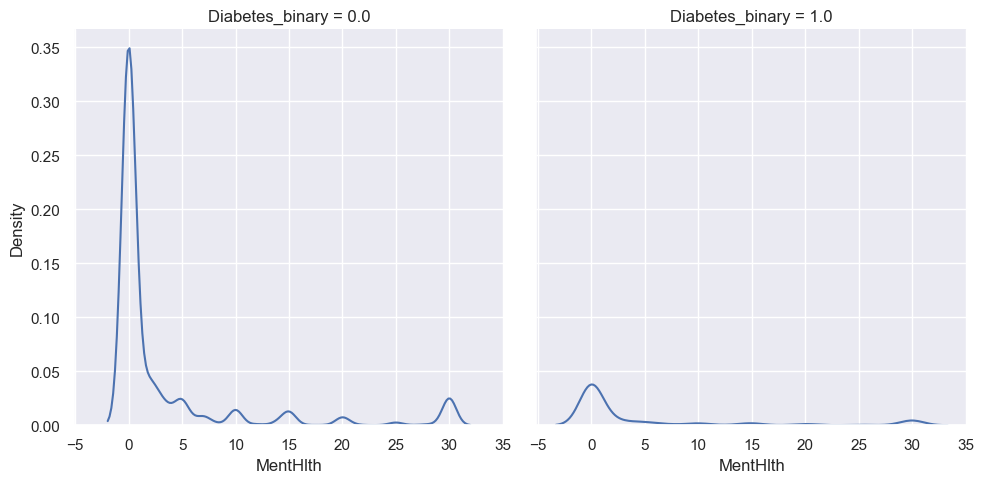

In [58]:
# MentHlth
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_binary', data = df, kind="kde")
plt.show()

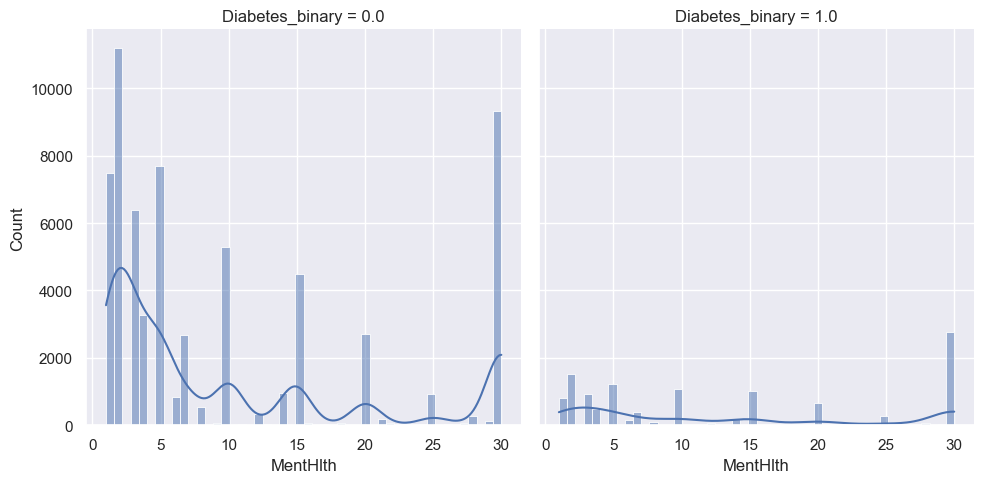

In [59]:
sns.displot(data=df.loc[(df['MentHlth']>0)&(df['Diabetes_binary']!="No Diabetes")],
            x='MentHlth',col='Diabetes_binary',col_wrap=2,kde=True);

In [60]:
# Mental health does not have an effect on diabetes.

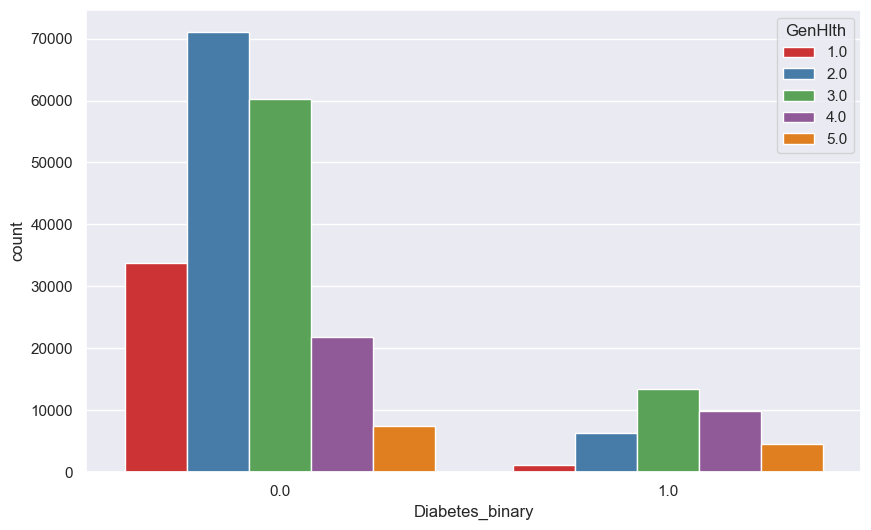

In [61]:
# GenHlth
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Diabetes_binary',hue='GenHlth',palette='Set1');

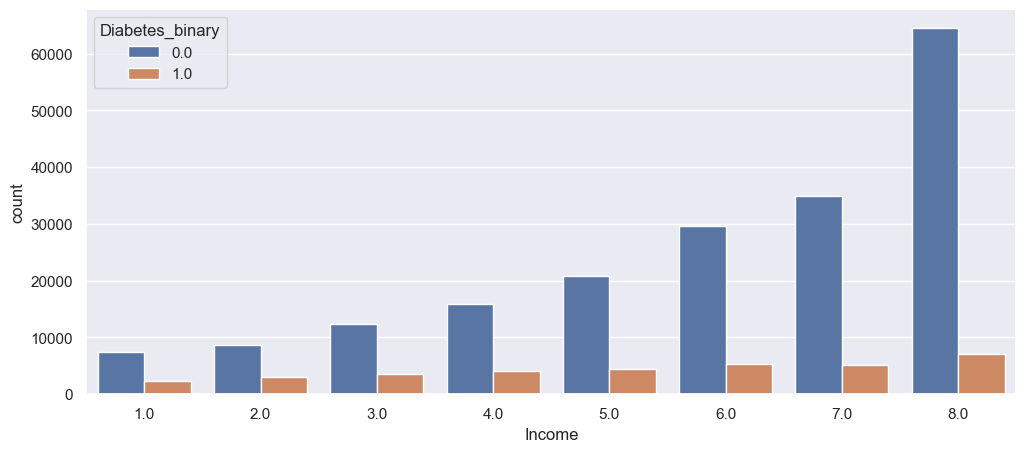

In [62]:
# Income
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_binary' , data = df)
plt.show()

<Figure size 1000x600 with 0 Axes>

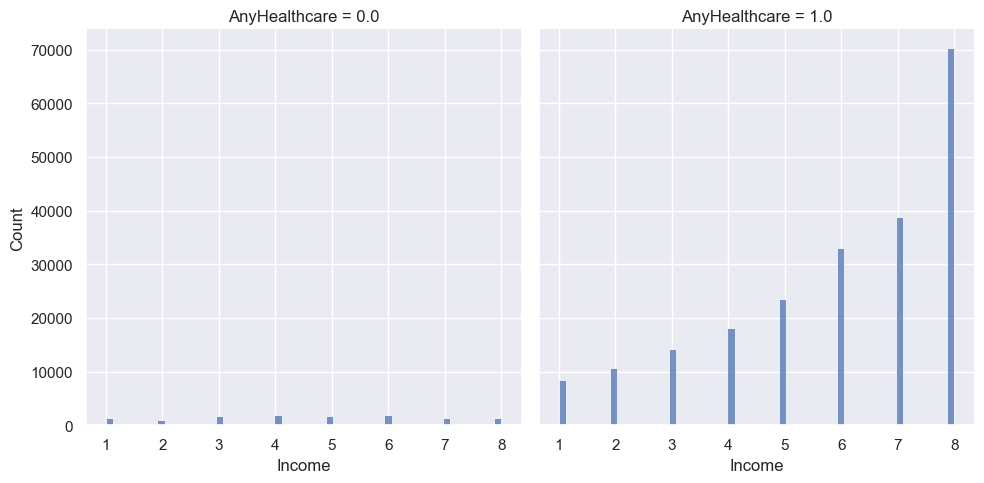

In [63]:
# The effect of the income on the healthcare
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Income',col='AnyHealthcare');

In [64]:
# If the person has higher income he or she has a good healthcare. 
# People with lower income have a higher risk of getting diabetes compared to those with higher income.

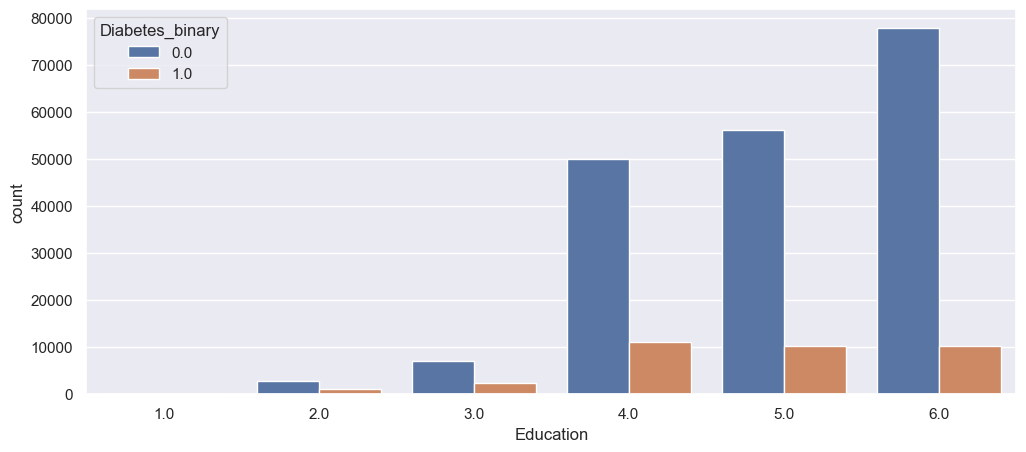

In [65]:
# Education
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Diabetes_binary' , data = df)
plt.show()

In [66]:
# As education goes up the number of diabetic people dicreases compared to those that are not diabetic.

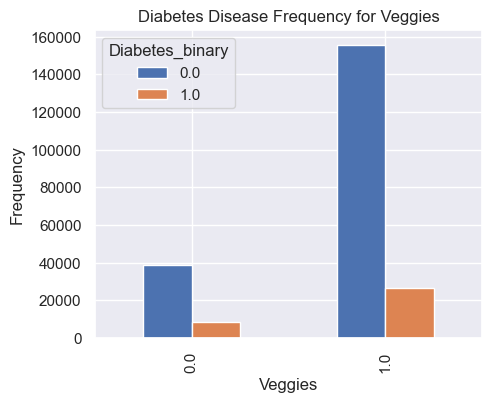

In [67]:
# Veggies

pd.crosstab(df.Veggies,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

In [68]:
# Eating vegetables reduce the risk of diabetes.

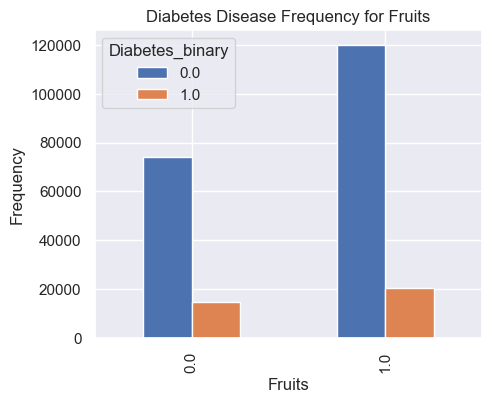

In [69]:
# Fruits

pd.crosstab(df.Fruits,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

In [70]:
# Eating fruits reduce the risk of diabetes.

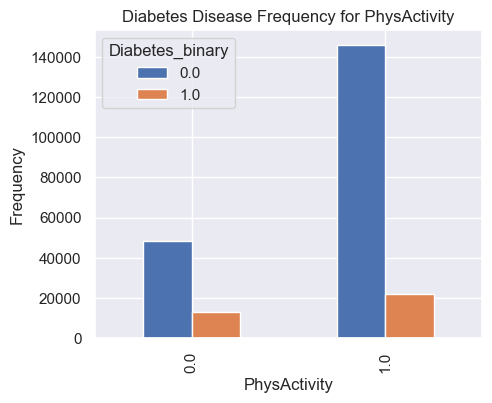

In [71]:
# PhysActivity
pd.crosstab(df.PhysActivity,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

In [72]:
# Physical activity reduces the risk of diabetes.

In [73]:
# Data pre-processing

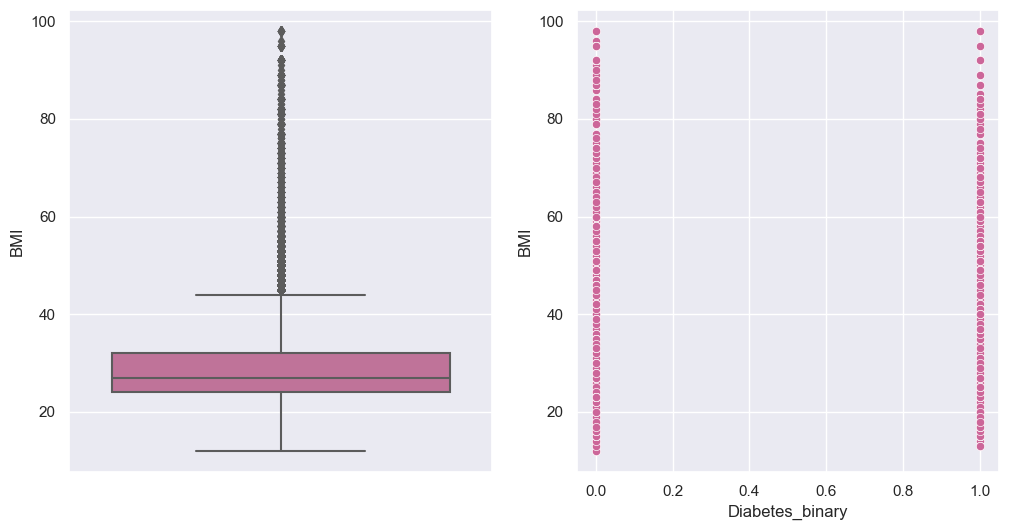

In [74]:
# Handling the outliers of the BMI
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_binary',y='BMI',color='#cc6699')
plt.show()

In [115]:
# Data Splitting

X=df.drop("Diabetes_binary",axis=1)
Y=df["Diabetes_binary"]

In [116]:
# Dealing with imbalancing
Y.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [117]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [118]:
y_sm.shape , x_sm.shape

((70692,), (70692, 21))

In [119]:
y_sm.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [120]:
# split the data into train and test sets
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

In [121]:
# Data Scalling for the input data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [128]:
# Modelling
# Define the model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(21,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose = 2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=64)
print('Test accuracy:', test_acc)


Epoch 1/50
884/884 - 7s - loss: 0.3511 - accuracy: 0.8425 - 7s/epoch - 7ms/step
Epoch 2/50
884/884 - 5s - loss: 0.3212 - accuracy: 0.8580 - 5s/epoch - 6ms/step
Epoch 3/50
884/884 - 6s - loss: 0.3085 - accuracy: 0.8648 - 6s/epoch - 6ms/step
Epoch 4/50
884/884 - 5s - loss: 0.3014 - accuracy: 0.8685 - 5s/epoch - 6ms/step
Epoch 5/50
884/884 - 5s - loss: 0.2982 - accuracy: 0.8701 - 5s/epoch - 6ms/step
Epoch 6/50
884/884 - 6s - loss: 0.2952 - accuracy: 0.8705 - 6s/epoch - 6ms/step
Epoch 7/50
884/884 - 5s - loss: 0.2926 - accuracy: 0.8720 - 5s/epoch - 6ms/step
Epoch 8/50
884/884 - 5s - loss: 0.2917 - accuracy: 0.8737 - 5s/epoch - 6ms/step
Epoch 9/50
884/884 - 6s - loss: 0.2903 - accuracy: 0.8737 - 6s/epoch - 6ms/step
Epoch 10/50
884/884 - 5s - loss: 0.2901 - accuracy: 0.8732 - 5s/epoch - 6ms/step
Epoch 11/50
884/884 - 5s - loss: 0.2903 - accuracy: 0.8742 - 5s/epoch - 6ms/step
Epoch 12/50
884/884 - 6s - loss: 0.2892 - accuracy: 0.8740 - 6s/epoch - 6ms/step
Epoch 13/50
884/884 - 5s - loss: 0.28

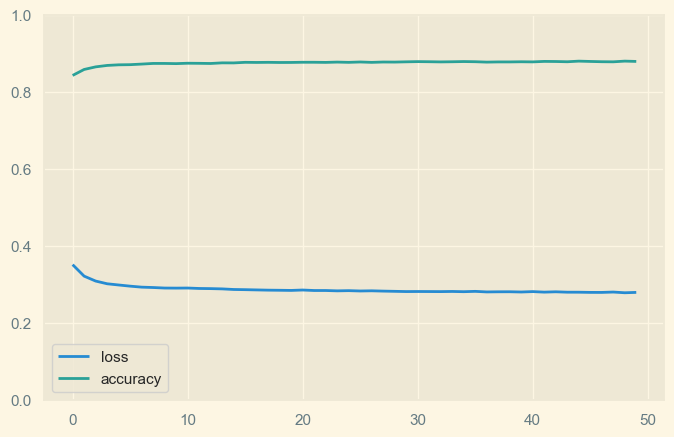

In [129]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
884/884 [==============================] - 7s 8ms/step - loss: 0.2772 - accuracy: 0.8800 - val_loss: 0.2850 - val_accuracy: 0.8758
Epoch 2/20
884/884 [==============================] - 8s 9ms/step - loss: 0.2771 - accuracy: 0.8798 - val_loss: 0.2804 - val_accuracy: 0.8791
Epoch 3/20
884/884 [==============================] - 7s 8ms/step - loss: 0.2786 - accuracy: 0.8793 - val_loss: 0.2828 - val_accuracy: 0.8757
Epoch 4/20
884/884 [==============================] - 8s 8ms/step - loss: 0.2772 - accuracy: 0.8798 - val_loss: 0.2791 - val_accuracy: 0.8782
Epoch 5/20
884/884 [==============================] - 7s 8ms/step - loss: 0.2773 - accuracy: 0.8795 - val_loss: 0.2802 - val_accuracy: 0.8766
Epoch 6/20
884/884 [==============================] - 7s 8ms/step - loss: 0.2763 - accuracy: 0.8803 - val_loss: 0.2816 - val_accuracy: 0.8774
Epoch 7/20
221/221 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.8767
Test accuracy: 0.8767239451408386


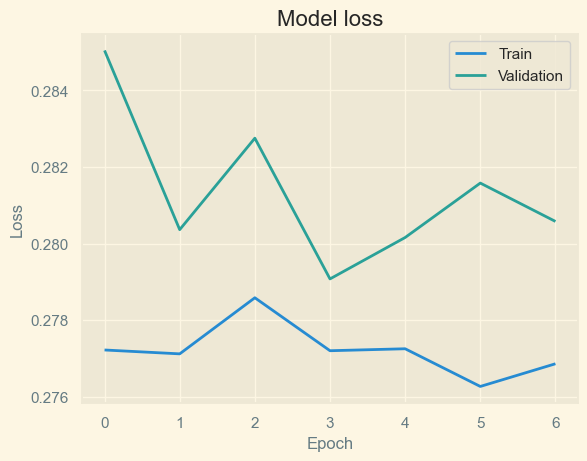

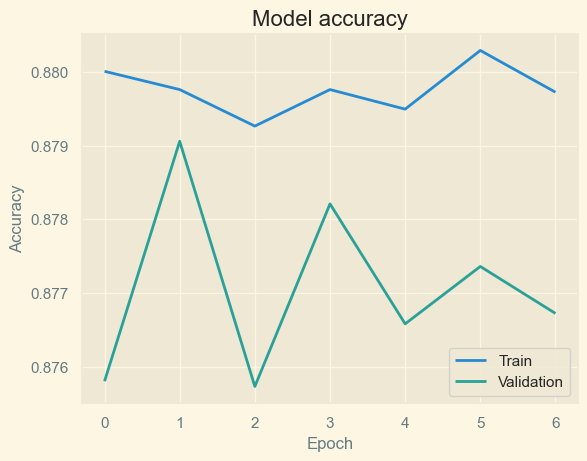

In [127]:
# define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# train the model with early stopping
history = model.fit(X_train, Y_train, epochs=20, batch_size=64,
          validation_data=(X_test, Y_test), callbacks=[early_stop])
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=64)
print('Test accuracy:', test_acc)

# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()